# Licencia Notebook
Casting Inteligente: Algoritmos para la selección óptima de actores

Copyright (C) 2024  Alaix, Alvarado, Choconta & Martinez

Este archivo es parte de FilmCast.

FilmCast es software libre: puedes redistribuirlo y/o modificarlo bajo los términos de la Licencia Pública General de GNU tal como fue publicada por la Free Software Foundation, ya sea la versión 3 de la Licencia o cualquier versión posterior.

FilmCast se distribuye con la esperanza de que sea útil, pero SIN NINGUNA GARANTÍA; ni siquiera la garantía implícita de COMERCIABILIDAD o IDONEIDAD PARA UN PROPÓSITO PARTICULAR. Consulta la Licencia Pública General de GNU para más detalles.

Deberías haber recibido una copia de la Licencia Pública General de GNU junto con FilmCast. Si no, consulta https://www.gnu.org/licenses/.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/GPLv3_Logo.svg/1920px-GPLv3_Logo.svg.png" alt="GPL" width="400" height="200">

# Licencia Dataset

Copyright (C) Anthony Therrien [Kaggle](https://www.kaggle.com/datasets/anthonytherrien/a-synthetic-journey-through-10000-actor-profiles/data).

Bajo la licencia CC BY-SA 4.0: Attribution-ShareAlike 4.0 International

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/CC_BY-SA_icon.svg/1200px-CC_BY-SA_icon.svg.png" alt="CC" width="380" height="125">

## Importar librerías
---

In [2]:
#!pip3 install -r ./requirements.txt

In [3]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from Functions import df_loader,plotBar,plotBox,plotScatter

df = df_loader(ruta='../Datasets/Actores.csv',separador=';')

## Dividir Dataframes con variables categóricas y numéricas

Dataframes finales:
- `df_cat`: Posee las variables categóricas; `Gender`, `Nationality`, `Genre Specialization`, y, `Education Level`.
- `df_num`: Posee las variables numéricas; `Age`, `Years Active`, `Beauty`, `Skill Level`, `Award Wins`, `Media Mentions`, `Social Media Followers`, `Social Media Likes`, `Network Size`, y, `Income`.

---

In [4]:
df_cat = df[[x for x in df.columns if df.dtypes[x] == 'O' and x != 'Name']]
df_num = df[[x for x in df.columns if df.dtypes[x] == 'int64' or df.dtypes[x] == 'float64']]

df_cat
df_num

,Age,Years Active,Beauty,Skill Level,Award Wins,Media Mentions,Social Media Followers,Social Media Likes,Network Size,Income
0,19,1,9.56,8.24,7,52,15678,4914,22,434056.09
1,48,19,7.88,9.61,10,37,18420,5378,30,1188216.47
2,49,23,7.43,9.76,12,46,17382,5033,23,1730313.22
3,41,15,8.08,15.55,9,42,16742,5005,25,818967.94
4,38,19,6.04,9.74,11,38,13428,4662,22,974068.97
...,...,...,...,...,...,...,...,...,...,...
12484,46,19,5.79,13.63,13,35,16560,5285,26,1415564.10
12485,29,11,7.59,14.89,9,40,16762,5266,18,472303.27
12486,38,12,5.57,6.93,7,30,13249,4505,24,564631.95
12487,20,2,7.15,6.66,6,39,17489,5249,23,350355.41


## One Hot-Encoder para variables categóricas
---

In [5]:
encoder = OneHotEncoder(sparse_output=False)


In [6]:
encoded_df = encoder.fit_transform(df_cat)
nombres = encoder.get_feature_names_out(df_cat.columns)

In [7]:
df_OHE = pd.DataFrame(encoded_df, columns=nombres)


NameError: name 'pd' is not defined

Después de pasar por la función One Hot-Encoder, la cantidad de variables incrementa a 14. Las cuales son:
- `Gender_Female`
- `Gender_Male`
- `Nationality_Canada`
- `Nationality_USA`
- `Genre Specialization_Action`
- `Genre Specialization_Comedy`
- `Genre Specialization_Drama`
- `Genre Specialization_Horror`
- `Genre Specialization_Musical`
- `Genre Specialization_Sci-Fi`
- `Education Level_College`
- `Education Level_Graduate`
- `Education Level_High School`
- `Education Level_University`

## Normalización de variables numéricas (rango de 0 a 1)
---

In [6]:
scaler = MinMaxScaler()
df_num_norm = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

## Crear el DataFrame concatenado

Se unen ambos Dataframes para tener los datos listos y preparados

---

In [7]:
df_final = pd.concat([df_num_norm, df_OHE], axis=1)
df_final

,Age,Years Active,Beauty,Skill Level,Award Wins,Media Mentions,Social Media Followers,Social Media Likes,Network Size,Income,...,Genre Specialization_Action,Genre Specialization_Comedy,Genre Specialization_Drama,Genre Specialization_Horror,Genre Specialization_Musical,Genre Specialization_Sci-Fi,Education Level_College,Education Level_Graduate,Education Level_High School,Education Level_University
0,0.019608,0.033333,0.641871,0.347386,0.3125,0.714286,0.357385,0.382643,0.290323,0.107866,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.588235,0.633333,0.513037,0.405143,0.5000,0.408163,0.546893,0.565680,0.548387,0.407797,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.607843,0.766667,0.478528,0.411467,0.6250,0.591837,0.475154,0.429586,0.322581,0.623391,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.450980,0.500000,0.528374,0.655565,0.4375,0.510204,0.430921,0.418540,0.387097,0.260946,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.392157,0.633333,0.371933,0.410624,0.5625,0.428571,0.201880,0.283235,0.290323,0.322630,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12484,0.549020,0.633333,0.352761,0.574621,0.6875,0.367347,0.418343,0.528994,0.419355,0.498214,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12485,0.215686,0.366667,0.490798,0.627740,0.4375,0.469388,0.432304,0.521499,0.161290,0.123077,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12486,0.392157,0.400000,0.335890,0.292159,0.3125,0.265306,0.189509,0.221302,0.354839,0.159796,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12487,0.039216,0.066667,0.457055,0.280776,0.2500,0.448980,0.482549,0.514793,0.322581,0.074578,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Matriz de correlación para variables numéricas

---

In [8]:
matriz_correlacion = df_num_norm.corr()
matriz_correlacion

,Age,Years Active,Beauty,Skill Level,Award Wins,Media Mentions,Social Media Followers,Social Media Likes,Network Size,Income
Age,1.000000,0.681540,-0.100788,0.078126,0.322724,0.023867,0.005287,0.006209,0.003182,0.356735
Years Active,0.681540,1.000000,-0.083110,0.101303,0.487865,0.019070,0.000052,0.003307,-0.005093,0.580834
Beauty,-0.100788,-0.083110,1.000000,0.071023,0.131087,-0.010667,-0.009024,0.010789,-0.023250,0.268190
Skill Level,0.078126,0.101303,0.071023,1.000000,0.666296,0.014185,-0.000041,0.007320,0.000962,0.289868
Award Wins,0.322724,0.487865,0.131087,0.666296,1.000000,-0.000328,-0.014174,0.006682,-0.010708,0.716495
Media Mentions,0.023867,0.019070,-0.010667,0.014185,-0.000328,1.000000,0.526474,0.316687,0.120417,0.128156
Social Media Followers,0.005287,0.000052,-0.009024,-0.000041,-0.014174,0.526474,1.000000,0.587083,0.219634,0.236427
Social Media Likes,0.006209,0.003307,0.010789,0.007320,0.006682,0.316687,0.587083,1.000000,0.371158,0.147801
Network Size,0.003182,-0.005093,-0.023250,0.000962,-0.010708,0.120417,0.219634,0.371158,1.000000,0.034089
Income,0.356735,0.580834,0.268190,0.289868,0.716495,0.128156,0.236427,0.147801,0.034089,1.000000


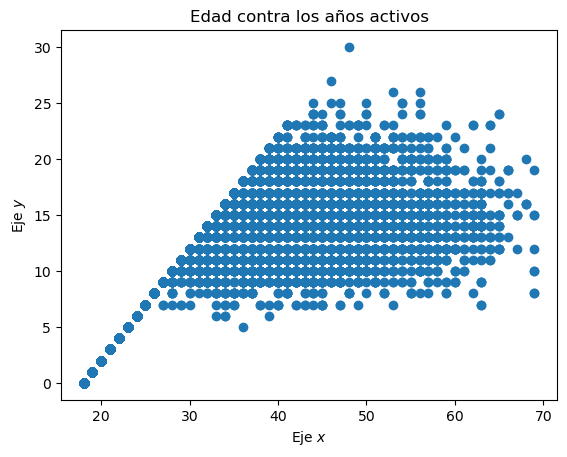

In [11]:
plotScatter('Age', 'Years Active', title='Edad contra los años activos')